In [1]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import pysd

/Users/saman/miniconda3/envs/test/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
model = pysd.read_vensim('innovation sd.mdl')

In [3]:
def evaluate_model(problem, model_parameter, return_columns=['profit per week']):
    # Generate samples
    param_values = saltelli.sample(problem, 100)
    Y = np.zeros([param_values.shape[0]])
    for i, X in enumerate(param_values):
        for j, param in enumerate(problem['names']):
            model_parameter[param] = X[j]
        # Run the simulation with the random parameter values
        result = model.run(params=model_parameter, return_columns=return_columns)
        Y[i] = np.average(result[return_columns[0]])
    return param_values, Y

In [31]:
model_parameter = {
    'hd': 6,
    'td': 10,
    'hrec': 4,
    'k': 0,
    'km1': 0,
    'km2': 0,
    'km3': 0,
    'km4': 0,
    'km5': 0,
    '"kused-prod"': 0,
    '"%reduction of demand"': 0.5,
    'krmsi': 0,
    'kp': 0,
    'kppi': 0,
    'kd': 0,
    'krpi': 0,
    'kc': 0,
    'kci': 0,
    # Add more parameters as needed
}

problem = {
    'num_vars': 3,
    'names': ['"%reduction of wm"', '"%increase of time"', '"%reduction of oc"'],
    'bounds': [ [0, 1], [0, 2], [0, 1]]
}

In [32]:
_,Y = evaluate_model(problem, model_parameter, ['Profit per week'])

print(Y)

/var/folders/19/plp0fk812hq1rlftnp9ck8j40000gn/T/ipykernel_48076/1622030262.py:3: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 100)
/Users/saman/miniconda3/envs/test/lib/python3.8/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (100) is equal to `2^n`.
        
  warnings.warn(msg)


[634304.61949149 618371.37026947 627078.69060695 629037.22007024
 634096.70043169 634145.58298017 630394.61095317 638552.32738601
 629367.14392546 628440.38004983 637565.49139141 616428.44753271
 630802.47724814 614378.99582946 611830.06302544 619965.89067624
 631994.6905798  630141.26270731 634773.25408941 617565.64651073
 621781.6772945  636809.18684534 616782.30032265 628420.14265871
 613179.69783221 616750.5301473  622659.78283039 620380.88540505
 641811.32420982 631763.20785066 632993.5728829  636071.99359988
 609644.31690192 625941.99458437 636116.5647783  636491.90220764
 629425.29217893 634745.85752002 630108.50019823 622708.99381227
 644151.20465331 633967.30195185 616533.86272906 611049.05353216
 626783.81348107 641942.97537607 625325.87724472 632347.97355786
 625001.4632078  617150.1642705  627497.98143631 601744.52315502
 637325.32483758 637439.57203535 618114.85691995 620896.48848431
 645295.36544758 653000.04224502 627209.80298761 631341.96716249
 643498.19170478 625265.3

In [33]:
Si = sobol.analyze(problem, Y)

In [34]:
print(Si['S1'])

[-0.29603186 -0.14958169 -0.03748258]


In [35]:
print(Si['ST'])

[0.73554571 1.21795969 0.78495999]


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

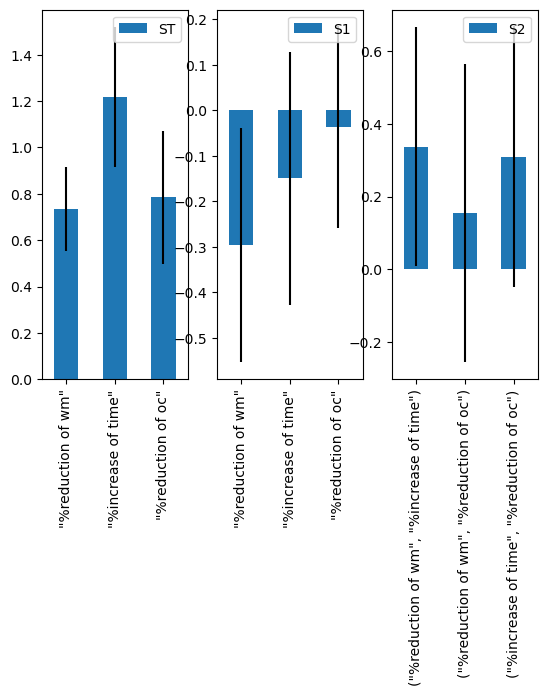

In [36]:
Si.plot()

In [59]:
Si

{'S1': array([0.92852106]),
 'S1_conf': array([0.23642949]),
 'ST': array([1.09209612]),
 'ST_conf': array([0.21802418]),
 'S2': array([[nan]]),
 'S2_conf': array([[nan]])}